# Generate Hologram parameters in Spectractor For AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : March 2 st 2021
- version 0

# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is


plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [3]:
FLAG_HOMOTHETIE   = True
FLAG_STEPOPTIMIZE = False

# constants

- all transverse physical coordinates are in mm and relative to beam optical center (at CCD center)

In [4]:
# conversion in good inits
u_radtodeg=180.0/np.pi
u_degtorad=np.pi/180.
u_mtomm=1e3

- all constants are refered as $c\_$

## Hologramn and Telescope constants

In [5]:
c_F=18.0*1.2*u_mtomm # Auxtel Focla length # ou 13.7m

In [6]:
c_F

21599.999999999996

In [7]:
c_Z1=200. # mm, distance between hologram and source plane during holo recording
c_Z0=178. # mm, distance between hologram and CCD plane for observations 

In [8]:
c_d1=20.0 # mm, distance between the sources during recording 

In [9]:
c_X_Oh=-7  # mm , x-coordinates of the hologram optical center in the CCD ref frame
c_Y_Oh=2.55 # mm , y-coordinate of the hologram optical center in the CCD ref frame

In [10]:
c_beta0=-0.275 #degree , angle of rotation of hologram source axis wrt CCD  

In [11]:
c_wl0 = 639*1e-6

## CCD constants

In [52]:
c_CCD_Nx_Pix=4000
c_CCD_Ny_Pix=4000
c_CCD_Pix_Size= 1e-2 # mm
c_CCD_XMIN= -20.0 # mm
c_CCD_XMAX= 20.0 # mm
c_CCD_YMIN= -20.0 # mm
c_CCD_YMAX= 20.0 # mm

In [50]:
c_CCD_Nx_Pix*c_CCD_Pix_Size

40.0

# Functions

- $(X,Y)$ : coordinates in CCD frame with telecope optical center as the origin
- $(x,y)$ : coordinates in hologram frame with telecope optical center as the origin the same reference axis as the CCD
- $(x_1,y_1)$ : coordinates in hologram reference frame, with telecope optical center as the origin, such the two sources A $(x_1(A),y_1(A))$ and B $(x_1(B),y_1(B))$ have coordinates:
$$
x_1(A)= x_1 (0)-d_1/2 
$$
$$
y_1(A)= y_1(0)
$$
$$
x_1(B)= x_1 (0)+d_1/2 
$$
$$
y_1(B)= y_1(0)
$$

## CCD geometry

In [47]:
def XYtoCCDpix(X,Y):
    """
    XYtoCCDpix(X,Y) : convert position in mm on CCD into pixel coordinates
    
    """
    
    i_pix_x= c_CCD_Nx_Pix/2+X/c_CCD_Pix_Size
    i_pix_y= c_CCD_Ny_Pix/2+Y/c_CCD_Pix_Size
    
    return i_pix_x,i_pix_y

## Hologram functions

In [15]:
def XYtoxy(XY,Z):
    """
    XYtoxy(XY,Z): convert coordinates in CCD plane (R) to the CCD plane projected at hologram plane.
    The origin of the coordinates is always the optical center of the telescope.
    
    The coordinates undergo an homothetie.
    
    
    
    input parameters
    - XY : numpy array of the 2-coordinates in CCD in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - xy : numpy array of the 2-coordinates in  in mm at hologram position
    """
    XY=np.array(XY)
    
    if FLAG_HOMOTHETIE:
        xy=(1-Z/c_F)*XY  #small contraction
    else:
        xy=XY
    
    return xy  

In [16]:
def XYtoxy_2D(X,Y,Z):
    """
    XYtoxy(XY,Z): convert coordinates in CCD plane (R) to the CCD plane projected at hologram plane.
    The origin of the coordinates is always the optical center of the telescope.
    
    The coordinates undergo an homothetie.
    
    
    
    input parameters
    - XY : numpy array of the 2-coordinates in CCD in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - xy : numpy array of the 2-coordinates in  in mm at hologram position
    """
    if FLAG_HOMOTHETIE:
        x=(1-Z/c_F)*X  #small contraction
        y=(1-Z/c_F)*Y  #small contraction
    else:
        x=X
        y=Y
    
    return x,y  

In [17]:
def xytoXY(xy,Z):
    """
    xytoXY(xy,Z): convert coordinates in hologram plane to CCD plane.
    The origin of the coordinates is always the optical center of the telescope.
    
    input parameters
    - xy : numpy array of the 2-coordinates in  in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - XY : numpy array of the 2-coordinates in CCD in mm
    
    """
    xy=np.array(xy)
    
    if FLAG_HOMOTHETIE:
        XY=1./(1-Z/c_F)*xy #small dilatation
    else:
        XY=xy
    
    return XY  

In [18]:
def xytoXY_2D(x,y,Z):
    """
    xytoXY(xy,Z): convert coordinates in hologram plane to CCD plane.
    The origin of the coordinates is always the optical center of the telescope.
    
    input parameters
    - xy : numpy array of the 2-coordinates in  in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - XY : numpy array of the 2-coordinates in CCD in mm
    
    """
    if FLAG_HOMOTHETIE: 
        X=1./(1-Z/c_F)*x #small dilatation
        Y=1./(1-Z/c_F)*y #small dilatation
    else:
        X=x
        Y=y
    
    return X,Y  

In [19]:
def xytox1y1(xy,beta,x0,y0):
    """
    xytox1y1(xy,alpha): convert coordinates in hologram plane (same ref axis as CCD) with origin at O, the optical center
    of the telescope the instrinsic hologram frame with origin Oh, the optical center of the hologram.
    
    Both system are rotated by an angle beta such the Oh-x1 axis is parallel to sources A,B)
    
    input parameters
    - xy : numpy array of the 2-coordinates in hologram which ref axis are those of CCD and origin is O
    - beta : angle in degree
    
    - (x0,y0) : coordinate of hologram geometrical Oh (projected at hologram plane)
    
    output parameter 
    - x1y1 : mm, numpy array of the 2-coordinates in the intrinsic hologram frame
    
    """
    
    cos_beta=np.cos(beta*u_degtorad)
    sin_beta=np.sin(beta*u_degtorad)
    x=xy[0]-x0
    y=xy[1]-y0   
    x1y1=np.array([cos_beta*x+sin_beta*y,-sin_beta*x+cos_beta*y])
    return x1y1
    
 

In [20]:
def xytox1y1_2D(x,y,beta,x0,y0):
    """
    
    2D version of function xytox1y1()
    
    convert coordinates in hologram plane (same ref axis as CCD) with origin at O, the optical center
    of the telescope the instrinsic hologram frame with origin Oh, the optical center of the hologram.
    
    Both system are rotated by an angle beta such the Oh-x1 axis is parallel to sources A,B)
     
    
    input parameters
    - x,y : 2D-numpy array of the 2-coordinates in hologram plane which ref axis are those of CCD and origin is O
    - alpha : angle in degree
    
    - (x0,y0) : coordinate of hologram geometrical Oh in CCD axis frame projected at hologram plane
    Usually x0,y0 are 2D arrays representing 
    the various hypothesis on Oh position when computing a Chi2 
    
    output parameter 
    - x1,y1 : mm, 2D-numpy array of the 2-coordinates in the intrinsic hologram frame
    
    """
    
    cos_beta=np.cos(beta*u_degtorad)
    sin_beta=np.sin(beta*u_degtorad)
    
    x=x-x0
    y=y-y0
    
    x1=cos_beta*x+sin_beta*y
    y1=-sin_beta*x+cos_beta*y
       
    
    return x1,y1

In [21]:
def x1y1toxy(x1y1,beta,x0,y0):
    """
    x1y1toxy(x1y1,beta,x0,y0): convert coordinates in the intrinsic hologram frame R1h to the hologram frame Rh
    with same axis as CCD , both frame being rotated by a relative angle beta
    
    input parameters
    - x1y1 : mm, numpy array of the 2-coordinates in the intrinsic hologram frame  R1h
    - beta : angle in degree
    - (x0,y0) : coordinate of hologram geometrical Oh in CCD axis frame but projected at hologram plane
    
    output parameter 
     - xy : numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
   
    
    """
    
    cos_beta=np.cos(beta*u_degtorad)
    sin_beta=np.sin(beta*u_degtorad)
    
    x1=x1y1[0]
    y1=x1y1[1]
    
    # note the coordinate are shifted wrt Oh point coordinates in CCD 
    xy=np.array([cos_beta*x1-sin_beta*y1+x0,sin_beta*x1+cos_beta*y1+y0])
    return xy

In [22]:
def x1y1toxy_2D(x1,y1,beta,x0,y0):
    """
    
    2D version of x1y1toxy(x1y1,beta,x0,y0):
    x1y1toxy_2D(x1,y1,alpha): convert coordinates in the intrinsic hologram frame  to the hologram frame 
    with same axis as CCD by an angle beta 
    
    input parameters
    - x1,y1 : mm, 2D numpy array of the 2-coordinates in the intrinsic hologram frame  
    - alpha : angle in degree
    - (x0,y0) : coordinate of hologram geometrical Oh in CCD axis frame but projected at hologram plane
    
    output parameter 
     - x,y : 2D numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
   
    
    """
    
    cos_beta=np.cos(beta*u_degtorad)
    sin_beta=np.sin(beta*u_degtorad)
    
    
    x=cos_beta*x1-sin_beta*y1+x0
    y=sin_beta*x1+cos_beta*y1+y0
    return x,y

In [23]:
def dist1_to_source(xy,xy_s):
    """
    dist1_to_source(xy,xy_s) : distance between a point M(x,y) to a source S(x_S,y_s) at hologram recording phase
    
    The alpha hologram rotation angle is not important provided both point M and source S have the same reference axis
    
     input parameters
    - xy   : mm, 1D-numpy array of the 2-coordinates of point M in the  hologram frame  
    - xy_s : mm, 1D-numpy array of the 2-coordinates of the source in the  hologram frame  
    
    
    output parameter:
    return the 3d distance 
    
    """
    
    return np.sqrt(c_Z1**2+ (xy[0]-xy_s[0])**2+ (xy[1]-xy_s[1])**2)

In [24]:
def ddist1_to_source(x,y,x_s,y_s):
    """
    ddist1_to_source(xy,xy_s) : distance between a point M(x,y) to a source S(x_S,y_s) at hologram recording phase
    
    more efficient than dist1_to_source(xy,xy_s) because x,y are 2D numpy arrays.
    
    The alpha hologram rotation angle is not important provided both point M and source S have the same reference axis
    
     input parameters
    - x,y   : mm, 2D-numpy array of the 2-coordinates of point M in the  hologram frame  
    - x,y_s : mm, scalar the 2-coordinates of the source in the  hologram frame  
    
    
    output parameter:
    return the distance in 3D in a 2D numpy array
    
    Note : Either (x,y) are 2 2D-numpy array and (x_s,y_s) are 2 scalars 
           Or  (x,y) are 2 scalars and (x_s,y_s) are 2 2D-numpy arrays
    
    """
    
    return np.sqrt(c_Z1**2 + (x-x_s)**2+ (y-y_s)**2)

In [25]:
def d_phi(x1y1):
    """  
    d_phi(x1y1) : phase difference (distance difference at point(x1y1) )
    
    input parameters
    - x1y1   : mm, numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
         
    output parameter:
    return the angle d_alpha in degree
    
    """
    
    
    x1y1_A=np.array([-c_d1/2, 0]) # coordinate of source A
    x1y1_B=np.array([+c_d1/2, 0]) # coordinate of source B
    
    d1_A=dist1_to_source(x1y1,x1y1_A)  # distance to source A
    d1_B=dist1_to_source(x1y1,x1y1_B)  # distance to source B
    
    d_phi=d1_A-d1_B
   
    
    return d_phi

In [26]:
def dd_phi(x1,y1):
    """
    dd_alpha(x1,y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    more efficient than d_alpha(x1y1,x1y1_0) because x1,y1 are a 2D numpy array
    
    input parameters are 2D numpy array
    - x1,y1   : mm, 2D numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
     
    
    output parameter:
    return the angle d_alpha in degree in a 2D numpy array
    
    
    Notes :
     - Either (x1,y1) may be 2 2D-numpy arrays and x1_0,y1_0 two scalars : to get the d_alpha(x1,y1)
     - Or fix (x1,y1) as two scalars where the angle is measured and (x1_0,y1_0) are 2 2D numpy arrays
     for scanning in chi2 function the best position for parameters (x1_0,y1_0) 
    
    """
    
    
    x1_A=-c_d1/2 # coordinate of source A
    y1_A=0.        # coordinate of source A
    
    x1_B=c_d1/2 # coordinate of source B
    y1_B=0        # coordinate of source B
    
    dd1_A=ddist1_to_source(x1,y1,x1_A,y1_A)  # distance to source A in a 2D numpy array
    dd1_B=ddist1_to_source(x1,y1,x1_B,y1_B)  # distance to source B
    
    
    dd_phi=dd1_A-dd1_B
    
    return dd_phi # in a 2D numpy array

In [27]:
def d_alpha(x1y1):
    """
    d_alpha(x1y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    
    input parameters
    - x1y1   : mm, numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
    
     
    output parameter:
    return the angle d_alpha in degree
    
    """
    
    
    x1y1_A=np.array([-c_d1/2, 0]) # coordinate of source A
    x1y1_B=np.array([+c_d1/2, 0]) # coordinate of source B
    
    d1_A=dist1_to_source(x1y1,x1y1_A)  # distance to source A
    d1_B=dist1_to_source(x1y1,x1y1_B)  # distance to source B
    
    
    num_tan_dalpha= d1_B*(x1y1[1]-x1y1_A[1])-d1_A*(x1y1[1]-x1y1_B[1])
    den_tan_dalpha= d1_B*(x1y1[0]-x1y1_A[0])-d1_A*(x1y1[0]-x1y1_B[0])
    
    #tan_dalpha=- num_tan_dalpha/den_tan_dalpha
    tan_dalpha= num_tan_dalpha/den_tan_dalpha
    
    d_alpha=u_radtodeg*np.arctan(tan_dalpha)
    
    return d_alpha

In [28]:
def dd_alpha(x1,y1):
    """
    dd_alpha(x1,y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    more efficient than d_alpha(x1y1,x1y1_0) because x1,y1 are a 2D numpy array
    
    input parameters are 2D numpy array
    - x1,y1   : mm, 2D numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
     
    
    output parameter:
    return the angle d_alpha in degree in a 2D numpy array
    
    
    Notes :
     - Either (x1,y1) may be 2 2D-numpy arrays and x1_0,y1_0 two scalars : to get the d_alpha(x1,y1)
     - Or fix (x1,y1) as two scalars where the angle is measured and (x1_0,y1_0) are 2 2D numpy arrays
     for scanning in chi2 function the best position for parameters (x1_0,y1_0) 
    
    """
    
    
    x1_A=-c_d1/2 # coordinate of source A
    y1_A=0.        # coordinate of source A
    
    x1_B=c_d1/2 # coordinate of source B
    y1_B=0        # coordinate of source B
    
    dd1_A=ddist1_to_source(x1,y1,x1_A,y1_A)  # distance to source A in a 2D numpy array
    dd1_B=ddist1_to_source(x1,y1,x1_B,y1_B)  # distance to source B
    
    
    num_tan_dalpha= dd1_B*(y1-y1_A)-dd1_A*(y1-y1_B)
    den_tan_dalpha= dd1_B*(x1-x1_A)-dd1_A*(x1-x1_B)
    
    #tan_dalpha=- num_tan_dalpha/den_tan_dalpha
    tan_dalpha= num_tan_dalpha/den_tan_dalpha   
    #d_alpha=u_radtodeg*np.arctan(tan_dalpha)
    
    d_alpha=u_radtodeg*np.arctan2(num_tan_dalpha,den_tan_dalpha)
    
    return d_alpha # in a 2D numpy array

In [29]:
def N_density(x1,y1):
    """
    
    Compute the grove density (ruling)
    
    """
    
    x1_A=-c_d1/2 # coordinate of source A
    y1_A=0.        # coordinate of source A
    
    x1_B=c_d1/2 # coordinate of source B
    y1_B=0        # coordinate of source B
    
    dd1_A=ddist1_to_source(x1,y1,x1_A,y1_A)  # distance to source A in a 2D numpy array
    dd1_B=ddist1_to_source(x1,y1,x1_B,y1_B)  # distance to source B
    
    alpha=dd_alpha(x1,y1)
    
    
    dNdx=1/c_wl0*( (x1-x1_A)/dd1_A - (x1-x1_B)/dd1_B)
    dNdy=1/c_wl0*( (y1-y1_A)/dd1_A - (y1-y1_B)/dd1_B)
    
    ruling=np.abs(dNdx*np.cos(alpha)+ dNdy*np.sin(alpha))
    #ruling=dNdx*np.cos(alpha)+ dNdy*np.sin(alpha)
    
    return ruling

# Check formula

In [30]:
XMIN=-40
XMAX=40
YMIN=-40
YMAX=40
NPIX=1000

In [31]:
X = np.linspace(XMIN, XMAX, NPIX)
Y = np.linspace(YMIN, YMAX, NPIX)
XX, YY = np.meshgrid(X, Y, sparse=False)

### Constant relative phase or 3D- distance to sources 

In [32]:
Z_Phi_holo=dd_phi(XX,YY)

In [33]:
X_ccd = np.linspace(XMIN, XMAX, NPIX)
Y_ccd = np.linspace(YMIN, YMAX, NPIX)
XX_ccd, YY_ccd = np.meshgrid(X_ccd, Y_ccd, sparse=False)

# homothetie toward hologram plane
xx_holo=XYtoxy(XX_ccd,c_Z0) 
yy_holo=XYtoxy(YY_ccd,c_Z0) 
# homothetie of point Oh projected in hologram plane
x_Oh,y_Oh=XYtoxy_2D(c_X_Oh,c_Y_Oh,c_Z0)

# rotation from CCD orientation toward hologram 
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,c_beta0,x_Oh,y_Oh)
Z_Phi_ccd=dd_phi(xx1_holo,yy1_holo) # compute dispersion angle inside hologram frame

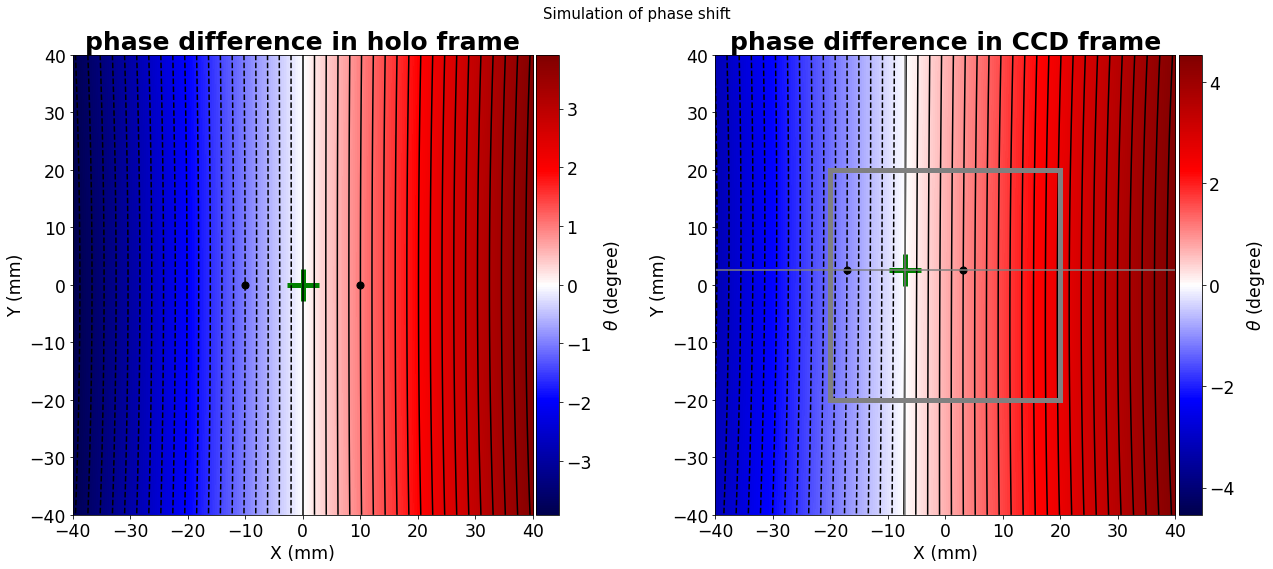

In [34]:
fig = plt.figure(figsize=(18,8))

# relative phase in hologram frame
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_Phi_holo,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_Phi_holo,levels=50,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

xy1_A=np.array([-c_d1/2,0])
xy1_B=np.array([c_d1/2,0])
xy1_Oh=np.array([0,0])

ax1.scatter(xy1_A[0],xy1_A[1],marker="o",color="k",s=50)
ax1.scatter(xy1_B[0],xy1_B[1],marker="o",color="k",s=50)
ax1.scatter(xy1_Oh[0],xy1_Oh[1],marker="+",color="g",s=1000,lw=5)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("phase difference in holo frame",fontweight="bold",fontsize=25)


# relative phase difference in CCD frame when hologram is rotated by an angle beta
ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
maxPhi=np.max(np.abs(Z_Phi_ccd))

im2=ax2.imshow(Z_Phi_ccd,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),vmin=-maxPhi,vmax=maxPhi)
h2 = ax2.contour(X_ccd,Y_ccd,Z_Phi_ccd,levels=50,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

# inverse rotation from hologram frame to frame in which axis are parralel in 
xy_A = x1y1toxy(xy1_A,c_beta0,x_Oh,y_Oh)
xy_B = x1y1toxy(xy1_B,c_beta0,x_Oh,y_Oh)
xy_Oh = x1y1toxy(xy1_Oh,c_beta0,x_Oh,y_Oh)

# inverse homothetie
XY_A = xytoXY(xy_A,c_Z0)
XY_B = xytoXY(xy_B,c_Z0)
XY_Oh = xytoXY(xy_Oh,c_Z0)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=50)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=50)
ax2.scatter(XY_Oh[0],XY_Oh[1],marker="+",color="g",s=1000,lw=5)

ax2.axvline(x=c_X_Oh,color="grey")
ax2.axhline(y=c_Y_Oh,color="grey")

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("phase difference in CCD frame",fontweight="bold",fontsize=25)

# CCD border
ax2.plot([-20,-20],[-20,20],color="grey",lw=5)
ax2.plot([20,20],[-20,20],color="grey",lw=5)
ax2.plot([-20,20],[-20,-20],color="grey",lw=5)
ax2.plot([-20,20],[20,20],color="grey",lw=5)

plt.suptitle("Simulation of phase shift",fontsize=15)
plt.tight_layout()

### dispersion angle Alpha

In [35]:
Z_Ang_holo=dd_alpha(XX,YY)

In [36]:
X_ccd = np.linspace(XMIN, XMAX, NPIX)
Y_ccd = np.linspace(YMIN, YMAX, NPIX)
XX_ccd, YY_ccd = np.meshgrid(X_ccd, Y_ccd, sparse=False)

# homothetie toward hologram plane
xx_holo=XYtoxy(XX_ccd,c_Z0) 
yy_holo=XYtoxy(YY_ccd,c_Z0) 

# homothetie of point Oh in hologram plane
x_Oh,y_Oh=XYtoxy_2D(c_X_Oh,c_Y_Oh,c_Z0)

# rotation from CCD orientation toward hologram 
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,c_beta0,x_Oh,y_Oh)

# calcul of dispersion angle in hologram frame
Z_Ang_ccd=dd_alpha(xx1_holo,yy1_holo)

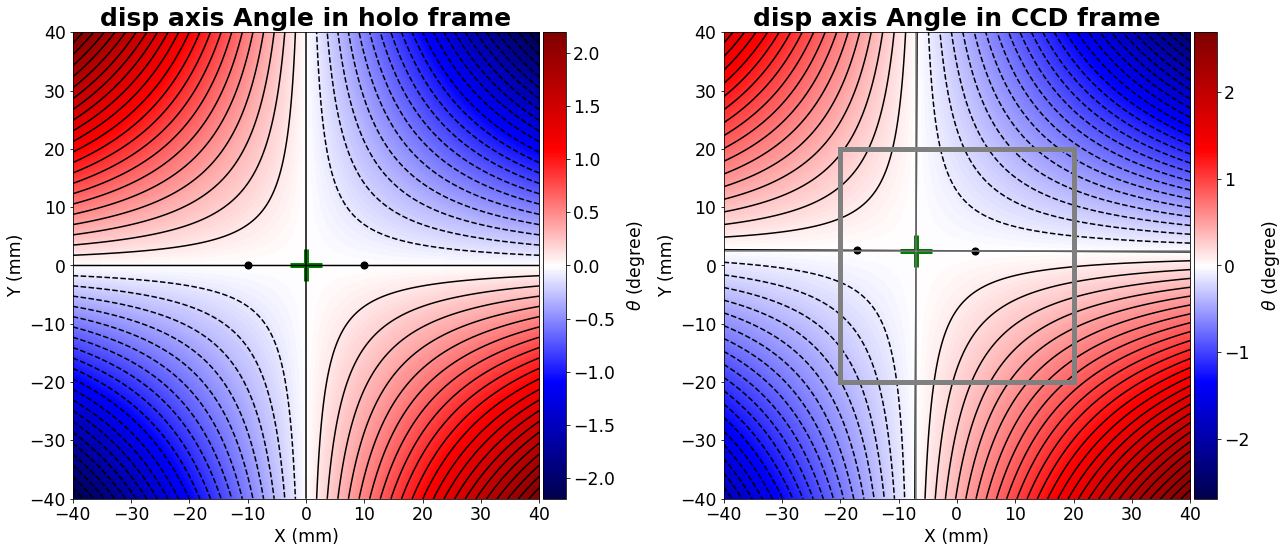

In [37]:
fig = plt.figure(figsize=(18,8))

# dispersion axis in hologram frame (Oh,x1,y1)

ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_Ang_holo,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_Ang_holo,levels=50,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

xy1_A=np.array([-c_d1/2,0])
xy1_B=np.array([c_d1/2,0])
xy1_Oh=np.array([0,0])

ax1.scatter(xy1_A[0],xy1_A[1],marker="o",color="k",s=50)
ax1.scatter(xy1_B[0],xy1_B[1],marker="o",color="k",s=50)
ax1.scatter(xy1_Oh[0],xy1_Oh[1],marker="+",color="g",s=1000,lw=5)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("disp axis Angle in holo frame",fontweight="bold",fontsize=25)

# dispersion angle in CCD frame (O,X,Y)

ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)

maxAng=np.max(np.abs(Z_Ang_ccd))
im2=ax2.imshow(Z_Ang_ccd,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),vmin=-maxAng,vmax=maxAng)
h2 = ax2.contour(X_ccd,Y_ccd,Z_Ang_ccd,levels=50,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

# inverse rotation
xy_A = x1y1toxy(xy1_A,c_beta0,x_Oh,y_Oh)
xy_B = x1y1toxy(xy1_B,c_beta0,x_Oh,y_Oh)
xy_Oh = x1y1toxy(xy1_Oh,c_beta0,x_Oh,y_Oh)

# inverse homothetie
XY_A = xytoXY(xy_A,c_Z0)
XY_B = xytoXY(xy_B,c_Z0)
XY_Oh = xytoXY(xy_Oh,c_Z0)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=50)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=50)
ax2.scatter(XY_Oh[0],XY_Oh[1],marker="+",color="g",s=1000,lw=5)

ax2.axvline(x=c_X_Oh,color="grey")
ax2.axhline(y=c_Y_Oh,color="grey")

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("disp axis Angle in CCD frame",fontweight="bold",fontsize=25)


# CCD border
ax2.plot([-20,-20],[-20,20],color="grey",lw=5)
ax2.plot([20,20],[-20,20],color="grey",lw=5)
ax2.plot([-20,20],[-20,-20],color="grey",lw=5)
ax2.plot([-20,20],[20,20],color="grey",lw=5)

plt.tight_layout()

### Density of lines

In [38]:
Z_N_holo=N_density(XX,YY)

In [39]:
X_ccd = np.linspace(XMIN, XMAX, NPIX)
Y_ccd = np.linspace(YMIN, YMAX, NPIX)
XX_ccd, YY_ccd = np.meshgrid(X_ccd, Y_ccd, sparse=False)

# homothetie toward hologram plane
xx_holo=XYtoxy(XX_ccd,c_Z0) 
yy_holo=XYtoxy(YY_ccd,c_Z0) 
# homothetie of point Oh projected in hologram plane
x_Oh,y_Oh=XYtoxy_2D(c_X_Oh,c_Y_Oh,c_Z0)

# rotation from CCD orientation toward hologram 
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,c_beta0,x_Oh,y_Oh)
Z_N_ccd=N_density(xx1_holo,yy1_holo) # compute dispersion angle inside hologram frame

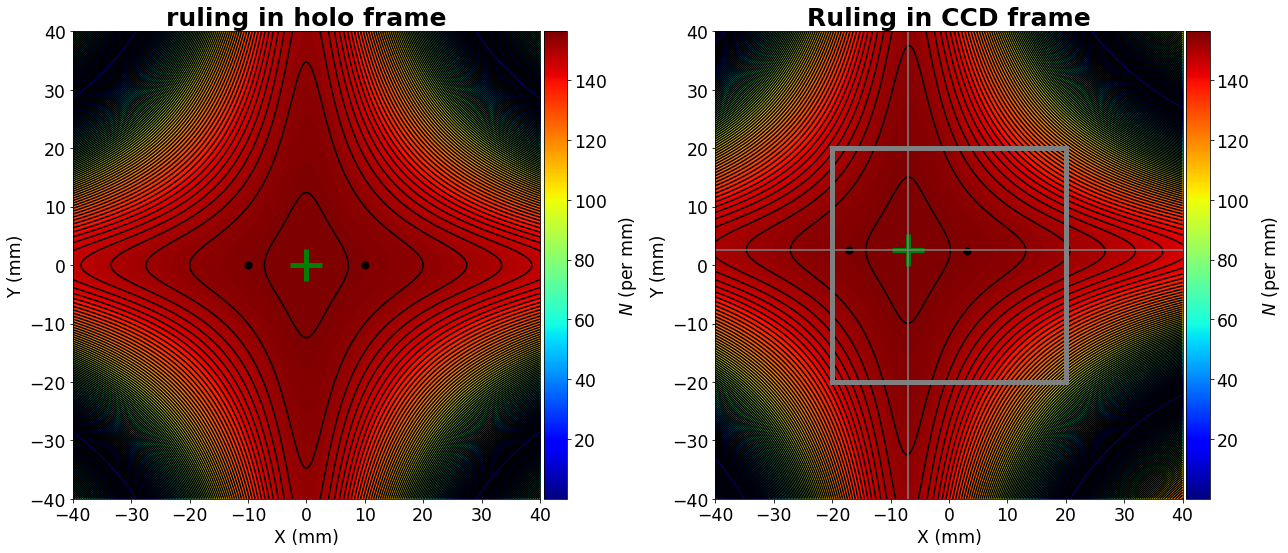

In [45]:
fig = plt.figure(figsize=(18,8))

# dispersion axis in hologram frame (Oh,x1,y1)

ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)

maxN=np.max(Z_N_holo)
minN=np.min(Z_N_holo)


im1=ax1.imshow(Z_N_holo,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_N_holo,levels=100,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$N$ (per mm)', rotation=90)

xy1_A=np.array([-c_d1/2,0])
xy1_B=np.array([c_d1/2,0])
xy1_Oh=np.array([0,0])

ax1.scatter(xy1_A[0],xy1_A[1],marker="o",color="k",s=50)
ax1.scatter(xy1_B[0],xy1_B[1],marker="o",color="k",s=50)
ax1.scatter(xy1_Oh[0],xy1_Oh[1],marker="+",color="g",s=1000,lw=5)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("ruling in holo frame",fontweight="bold",fontsize=25)

# dispersion angle in CCD frame (O,X,Y)

ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)

maxN=np.max(Z_N_ccd)
minN=np.min(Z_N_ccd)

im2=ax2.imshow(Z_N_ccd,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX),vmin=minN,vmax=maxN)
h2 = ax2.contour(X_ccd,Y_ccd,Z_N_ccd,levels=100,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$N$ (per mm)', rotation=90)

# inverse rotation
xy_A = x1y1toxy(xy1_A,c_beta0,x_Oh,y_Oh)
xy_B = x1y1toxy(xy1_B,c_beta0,x_Oh,y_Oh)
xy_Oh = x1y1toxy(xy1_Oh,c_beta0,x_Oh,y_Oh)

# inverse homothetie
XY_A = xytoXY(xy_A,c_Z0)
XY_B = xytoXY(xy_B,c_Z0)
XY_Oh = xytoXY(xy_Oh,c_Z0)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=50)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=50)
ax2.scatter(XY_Oh[0],XY_Oh[1],marker="+",color="g",s=1000,lw=5)

ax2.axvline(x=c_X_Oh,color="grey")
ax2.axhline(y=c_Y_Oh,color="grey")

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("Ruling in CCD frame",fontweight="bold",fontsize=25)

# CCD border
ax2.plot([-20,-20],[-20,20],color="grey",lw=5)
ax2.plot([20,20],[-20,20],color="grey",lw=5)
ax2.plot([-20,20],[-20,-20],color="grey",lw=5)
ax2.plot([-20,20],[20,20],color="grey",lw=5)


plt.tight_layout()

# Generate Files

## Make the CCD grid

In [103]:
x_ccd=np.linspace(c_CCD_XMIN,c_CCD_XMAX,11)
y_ccd=np.linspace(c_CCD_YMIN,c_CCD_YMAX,11)
x_ccd=np.delete(x_ccd,[0,-1])
y_ccd=np.delete(y_ccd,[0,-1])
nx=len(x_ccd)
ny=len(y_ccd)

In [64]:
xv_ccd, yv_ccd = np.meshgrid(x_ccd, y_ccd)

In [65]:
xv_ccd

array([[-16., -12.,  -8.,  -4.,   0.,   4.,   8.,  12.,  16.],
       [-16., -12.,  -8.,  -4.,   0.,   4.,   8.,  12.,  16.],
       [-16., -12.,  -8.,  -4.,   0.,   4.,   8.,  12.,  16.],
       [-16., -12.,  -8.,  -4.,   0.,   4.,   8.,  12.,  16.],
       [-16., -12.,  -8.,  -4.,   0.,   4.,   8.,  12.,  16.],
       [-16., -12.,  -8.,  -4.,   0.,   4.,   8.,  12.,  16.],
       [-16., -12.,  -8.,  -4.,   0.,   4.,   8.,  12.,  16.],
       [-16., -12.,  -8.,  -4.,   0.,   4.,   8.,  12.,  16.],
       [-16., -12.,  -8.,  -4.,   0.,   4.,   8.,  12.,  16.]])

## Hologram Center

In [81]:
XYtoCCDpix(c_X_Oh,c_Y_Oh)

(1300.0, 2255.0)

##  1) N file

In [ ]:
filename="N.txt"

In [41]:
N= c_d1/(c_wl0*c_Z1)

In [42]:
N

156.49452269170578

In [74]:
#paramfile_txt = "\n"
paramfile_txt = str(N) + "\n"  + str(c_beta0) + "\n"

In [75]:
paramfile_txt

'156.49452269170578\n-0.275\n'

In [76]:
with open(filename, 'w') as out:
    out.write(paramfile_txt)

In [77]:
! cat N.txt

156.49452269170578
-0.275


# Hologram center

In [90]:
filename="hologram_center.txt"

In [84]:
ipix_ccd,ypix_ccd=XYtoCCDpix(c_X_Oh,c_Y_Oh)

In [86]:
ipix_ccd

1300.0

In [88]:
paramfile_txt = "#x_center y_center theta_tilt_in_degree\n"
paramfile_txt += str(ipix_ccd) + " " + str(ypix_ccd) + " " + str(c_beta0) + "\n"

In [89]:
paramfile_txt

'#x_center y_center theta_tilt_in_degree\n1300.0 2255.0 -0.275\n'

In [91]:
with open(filename, 'w') as out:
    out.write(paramfile_txt)

In [92]:
!cat hologram_center.txt

#x_center y_center theta_tilt_in_degree
1300.0 2255.0 -0.275


## Groove per mm

In [93]:
filename="hologram_center.txt"

In [94]:
paramfile_txt = "#x_star y_star grooves_per_mm grooves_per_mm_err \n"

In [95]:
# homothetie toward hologram plane
xx_holo=XYtoxy(xv_ccd,c_Z0) 
yy_holo=XYtoxy(yv_ccd,c_Z0) 
# homothetie of point Oh projected in hologram plane
x_Oh,y_Oh=XYtoxy_2D(c_X_Oh,c_Y_Oh,c_Z0)

# rotation from CCD orientation toward hologram 
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,c_beta0,x_Oh,y_Oh)
Z_N_ccd=N_density(xx1_holo,yy1_holo) # compute dispersion angle inside hologram frame

In [99]:
ipix_xv,ipix_yv=XYtoCCDpix(xv_ccd,yv_ccd)

In [105]:
for iy in np.arange(ny):
    for ix in np.arange(nx):
        a = ipix_xv[iy,ix]
        b = ipix_yv[iy,ix]
        c = Z_N_ccd[iy,ix]
        paramfile_txt += str(a) + " " + str(b)+ " " + str(c) +"\n"

In [107]:
with open(filename, 'w') as out:
    out.write(paramfile_txt)

In [108]:
!cat hologram_center.txt

#x_star y_star grooves_per_mm grooves_per_mm_err 
400.0 400.0 151.2171447520402
800.0 400.0 154.29473235239777
1200.0 400.0 155.5971218306961
1600.0 400.0 155.11301789836284
2000.0 400.0 152.85992053492436
2400.0 400.0 148.88350887628098
2800.0 400.0 143.25641589933716
3200.0 400.0 136.0764347680691
3600.0 400.0 127.46421414732546
400.0 800.0 152.95671543985412
800.0 800.0 154.99766344265322
1200.0 800.0 155.862906200491
1600.0 800.0 155.54962839931878
2000.0 800.0 154.06939729003167
2400.0 800.0 151.44783795212376
2800.0 800.0 147.7240535946953
3200.0 800.0 142.9498077631943
3600.0 800.0 137.1884915901289
400.0 1200.0 154.30438257236946
800.0 1200.0 155.54089935233142
1200.0 1200.0 156.06616173882122
1600.0 1200.0 155.88103415143496
2000.0 1200.0 154.9929104911153
2400.0 1200.0 153.4155569905344
2800.0 1200.0 151.16885514722256
3200.0 1200.0 148.27845132621417
3600.0 1200.0 144.77532192753304
400.0 1600.0 155.2388501393798
800.0 1600.0 155.91688974017598
1200.0 1600.0 156.205617566171

## Rotation angle

In [118]:
filename="hologram_rotation_angle.txt"

In [112]:
# calcul of dispersion angle in hologram frame
Z_Ang_ccd=dd_alpha(xx1_holo,yy1_holo)

In [119]:
paramfile_txt = "# x_star y_star theta_in_degree\n"

In [120]:
for iy in np.arange(ny):
    for ix in np.arange(nx):
        a = ipix_xv[iy,ix]
        b = ipix_yv[iy,ix]
        c = Z_Ang_ccd[iy,ix]+c_beta0
        paramfile_txt += str(a) + " " + str(b)+ " " + str(c) +"\n"

In [121]:
with open(filename, 'w') as out:
    out.write(paramfile_txt)

In [122]:
!cat hologram_rotation_angle.txt

# x_star y_star theta_in_degree
400.0 400.0 -0.505883187341338
800.0 400.0 -0.40211403431493065
1200.0 400.0 -0.29855521673064334
1600.0 400.0 -0.1952068337561834
2000.0 400.0 -0.09206897759178814
2400.0 400.0 0.010858261877005004
2800.0 400.0 0.1135747925111254
3200.0 400.0 0.2160805155064799
3600.0 400.0 0.3183753212082482
400.0 800.0 -0.4571917475774507
800.0 800.0 -0.3754533485350751
1200.0 800.0 -0.29392762020678254
1600.0 800.0 -0.2126144345015195
2000.0 800.0 -0.13151365971326917
2400.0 800.0 -0.050625164217957486
2800.0 800.0 0.030051179903111458
3200.0 800.0 0.11051549337085992
3600.0 800.0 0.1907678864012044
400.0 1200.0 -0.4078640841756842
800.0 1200.0 -0.3483466645541572
1200.0 1200.0 -0.28904358936422775
1600.0 1200.0 -0.22995465010250563
2000.0 1200.0 -0.17107963732880563
2400.0 1200.0 -0.1124183433690569
2800.0 1200.0 -0.053970564956250355
3200.0 1200.0 0.004263894232249543
3600.0 1200.0 0.062285221180675365
400.0 1600.0 -0.3580115798686597
800.0 1600.0 -0.32085445504360

# FWHM

In [124]:
filename="hologram_min_fwhm.txt"

In [125]:
paramfile_txt = "# x_star y_star min_fwhm\n"

In [126]:
for iy in np.arange(ny):
    for ix in np.arange(nx):
        a = ipix_xv[iy,ix]
        b = ipix_yv[iy,ix]
        c = 25
        paramfile_txt += str(a) + " " + str(b)+ " " + str(c) +"\n"

In [127]:
with open(filename, 'w') as out:
    out.write(paramfile_txt)

In [128]:
!cat hologram_min_fwhm.txt

# x_star y_star min_fwhm
400.0 400.0 25
800.0 400.0 25
1200.0 400.0 25
1600.0 400.0 25
2000.0 400.0 25
2400.0 400.0 25
2800.0 400.0 25
3200.0 400.0 25
3600.0 400.0 25
400.0 800.0 25
800.0 800.0 25
1200.0 800.0 25
1600.0 800.0 25
2000.0 800.0 25
2400.0 800.0 25
2800.0 800.0 25
3200.0 800.0 25
3600.0 800.0 25
400.0 1200.0 25
800.0 1200.0 25
1200.0 1200.0 25
1600.0 1200.0 25
2000.0 1200.0 25
2400.0 1200.0 25
2800.0 1200.0 25
3200.0 1200.0 25
3600.0 1200.0 25
400.0 1600.0 25
800.0 1600.0 25
1200.0 1600.0 25
1600.0 1600.0 25
2000.0 1600.0 25
2400.0 1600.0 25
2800.0 1600.0 25
3200.0 1600.0 25
3600.0 1600.0 25
400.0 2000.0 25
800.0 2000.0 25
1200.0 2000.0 25
1600.0 2000.0 25
2000.0 2000.0 25
2400.0 2000.0 25
2800.0 2000.0 25
3200.0 2000.0 25
3600.0 2000.0 25
400.0 2400.0 25
800.0 2400.0 25
1200.0 2400.0 25
1600.0 2400.0 25
2000.0 2400.0 25
2400.0 2400.0 25
2800.0 2400.0 25
3200.0 2400.0 25
3600.0 2400.0 25
400.0 2800.0 25
800.0 2800.0 25
1200.0 2800.0 25
1600.0 2800.0 25
2000.0 2800.0 25
2400